In [7]:
import pandas as pd
file_path = '/Users/evayang/Documents/Self-learning/a2_Dataset_90Percent.xlsx'  
data = pd.read_excel(file_path)
csv_file_path = '/Users/evayang/Documents/Self-learning/predict_data.csv' 
data.to_csv(csv_file_path, index=False, encoding='utf-8')
print(f"CSV: {csv_file_path}")

CSV 文件已保存至: /Users/evayang/Documents/Self-learning/predict_data.csv


In [9]:
!pip install pandas pymysql sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 443.7 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [13]:
import pandas as pd
from sqlalchemy import create_engine

db_username = 'root' 
db_password = 'Yangyiwei113!'  
db_host = '127.0.0.1'         
db_port = '3306'              
db_name = 'Market'     

db_connection_str = f'mysql+pymysql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(db_connection_str)

query = "SELECT * FROM customer_data"
customer_data = pd.read_sql(query, con=engine)

query1 = "SELECT * FROM predict_data"
predict_data = pd.read_sql(query1, con=engine)

#data.to_sql('customer_data', con=engine, if_exists='replace', index=False)


# 1. Data Processing

In [57]:
customer_data.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,10,76.0,3,3,1,12,0,16000.00,4.0,0
1,4,49.0,4,3,1,12,0,6000.00,5.0,0
2,5,70.0,4,1,1,12,2,0.02,8.0,1
3,10,65.0,6,2,1,5,3,0.01,7.0,1
4,11,68.0,1,1,1,5,3,0.01,8.0,0


In [58]:
#dropping customer ID column from the dataset for modelling
customer_data=customer_data.drop(['ID'],axis=1)
customer_data.head()

KeyError: "['ID'] not found in axis"

In [ ]:
customer_data.isna().sum()

In [ ]:
# encoding data and converting to mumeric
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

customer_data['DemClusterGroup'] = number.fit_transform(customer_data['DemClusterGroup'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

customer_data['DemGender'] = number.fit_transform(customer_data['DemGender'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

customer_data['DemReg'] = number.fit_transform(customer_data['DemReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

customer_data['DemTVReg'] = number.fit_transform(customer_data['DemTVReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

customer_data['LoyalClass'] = number.fit_transform(customer_data['LoyalClass'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

In [ ]:
customer_data.head()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(z):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]

    return(vif)

In [59]:
z = customer_data.iloc[:,0:9]
calc_vif(z)

,variables,VIF
0,DemAffl,6.213792
1,DemAge,11.732676
2,DemClusterGroup,4.977809
3,DemGender,3.652499
4,DemReg,4.109431
5,DemTVReg,4.379905
6,LoyalClass,3.897075
7,LoyalSpend,1.841959
8,LoyalTime,3.152162


In [60]:
y = customer_data.iloc[:, 9].values
X = customer_data.iloc[:, 0:9].values

# 2. Modelling

In [61]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
classifier =  LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [64]:
import joblib
joblib.dump(classifier, './c2_Classifier_LoyalCustomers')

['./c2_Classifier_LoyalCustomers']

In [65]:
print(confusion_matrix(y_test,y_pred))

[[2822  135]
 [ 613  325]]


In [66]:
print(accuracy_score(y_test, y_pred))

0.8079589216944801


In [67]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.49666211, 0.50333789],
       [0.92910087, 0.07089913],
       [0.74146776, 0.25853224],
       ...,
       [0.61070989, 0.38929011],
       [0.92491465, 0.07508535],
       [0.75206206, 0.24793794]])

In [69]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
df_x_test = pd.DataFrame(X_test)

dfx=pd.concat([df_x_test,df_test_dataset, df_prediction_prob], axis=1)

dfx.to_csv("/Users/evayang/Documents/Self-learning/c1_ModelOutput_10Percent.csv")

dfx.head(2000)

,0,1,2,3,4,5,6,7,8,Actual Outcome,prob_0,prob_1
0,11.0,33.0,3.0,2.0,4.0,4.0,3.0,0.01,5.0,0,0.496662,0.503338
1,6.0,53.0,0.0,3.0,1.0,12.0,2.0,500.00,8.0,0,0.929101,0.070899
2,10.0,57.0,5.0,1.0,1.0,5.0,2.0,50.00,11.0,0,0.741468,0.258532
3,12.0,60.0,3.0,1.0,4.0,4.0,3.0,0.01,8.0,0,0.717957,0.282043
4,7.0,62.0,3.0,0.0,1.0,5.0,3.0,0.01,8.0,0,0.870353,0.129647
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,16.0,59.0,5.0,1.0,1.0,3.0,2.0,2000.00,5.0,0,0.432726,0.567274
1996,9.0,50.0,6.0,1.0,4.0,9.0,3.0,0.01,5.0,0,0.747502,0.252498
1997,10.0,54.0,6.0,1.0,1.0,5.0,3.0,0.01,5.0,0,0.725531,0.274469
1998,13.0,79.0,6.0,1.0,1.0,3.0,3.0,0.01,9.0,1,0.832560,0.167440


# 3. Prediction

In [70]:
predict_data.isna().sum()

ID                   0
DemAffl              0
DemAge               0
DemClusterGroup      0
DemGender            0
DemReg               0
DemTVReg             0
LoyalClass           0
LoyalSpend           0
LoyalTime            0
TargetBuy          877
dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

predict_data['DemClusterGroup'] = number.fit_transform(predict_data['DemClusterGroup'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

predict_data['DemGender'] = number.fit_transform(predict_data['DemGender'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

predict_data['DemReg'] = number.fit_transform(predict_data['DemReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

predict_data['DemTVReg'] = number.fit_transform(predict_data['DemTVReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

predict_data['LoyalClass'] = number.fit_transform(predict_data['LoyalClass'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}
{'0': 0, '1': 1, '2': 2, '3': 3}
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13}
{'0': 0, '1': 1, '2': 2, '3': 3}


In [72]:
predict_data.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,140,10,76.0,3,3,1,4,0,16000.00,4.0,None
1,620,4,49.0,4,3,1,4,0,6000.00,5.0,None
2,868,5,70.0,4,1,1,4,2,0.02,8.0,None
3,1120,10,65.0,6,2,1,9,3,0.01,7.0,None
4,2313,11,68.0,1,1,1,9,3,0.01,8.0,None


In [73]:
X_fresh = predict_data.iloc[:, 1:10].values

In [74]:
import joblib
classifier = joblib.load('c2_Classifier_LoyalCustomers')

In [75]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [76]:
predictions = classifier.predict_proba(X_fresh)
predictions

array([[0.94307107, 0.05692893],
       [0.9352446 , 0.0647554 ],
       [0.95540086, 0.04459914],
       ...,
       [0.85632984, 0.14367016],
       [0.97542561, 0.02457439],
       [0.54561391, 0.45438609]])

In [78]:
# writing model output file
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
dfx=pd.concat([predict_data,df_prediction_prob], axis=1)
dfx.to_csv("d2_BuyProb_90Percent.csv")
dfx.head(2000)

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy,prob_0,prob_1
0,140,10,76.0,3,3,1,4,0,16000.00,4.0,None,0.943071,0.056929
1,620,4,49.0,4,3,1,4,0,6000.00,5.0,None,0.935245,0.064755
2,868,5,70.0,4,1,1,4,2,0.02,8.0,None,0.955401,0.044599
3,1120,10,65.0,6,2,1,9,3,0.01,7.0,None,0.868932,0.131068
4,2313,11,68.0,1,1,1,9,3,0.01,8.0,None,0.832691,0.167309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,3584852,20,48.0,6,2,1,9,2,500.00,9.0,None,0.164695,0.835305
873,3584909,6,51.0,5,0,1,7,3,0.01,8.0,None,0.816965,0.183035
874,3585093,9,57.0,5,2,4,8,2,3000.00,1.0,None,0.856330,0.143670
875,3585174,4,77.0,5,1,4,8,0,6035.46,9.0,None,0.975426,0.024574


In [80]:
# 假设你设置的阈值为 0.7，概率高于 0.7 则认为客户可能会购买
threshold = 0.7
dfx['Predicted Outcome'] = dfx['prob_1'].apply(lambda x: 1 if x >= threshold else 0)
dfx.head(2000)

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy,prob_0,prob_1,Predicted Outcome
0,140,10,76.0,3,3,1,4,0,16000.00,4.0,None,0.943071,0.056929,0
1,620,4,49.0,4,3,1,4,0,6000.00,5.0,None,0.935245,0.064755,0
2,868,5,70.0,4,1,1,4,2,0.02,8.0,None,0.955401,0.044599,0
3,1120,10,65.0,6,2,1,9,3,0.01,7.0,None,0.868932,0.131068,0
4,2313,11,68.0,1,1,1,9,3,0.01,8.0,None,0.832691,0.167309,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,3584852,20,48.0,6,2,1,9,2,500.00,9.0,None,0.164695,0.835305,1
873,3584909,6,51.0,5,0,1,7,3,0.01,8.0,None,0.816965,0.183035,0
874,3585093,9,57.0,5,2,4,8,2,3000.00,1.0,None,0.856330,0.143670,0
875,3585174,4,77.0,5,1,4,8,0,6035.46,9.0,None,0.975426,0.024574,0


In [81]:
# 计算潜在收益与样品成本
dfx['Expected Profit'] = dfx['prob_1'] * 15000  # 预期收益为购买的概率乘以每个成功客户的收益
dfx['Sample Cost'] = 4420  # 样品成本固定为 4,420

# 计算投资回报率（ROI）
dfx['ROI'] = (dfx['Expected Profit'] - dfx['Sample Cost']) / dfx['Sample Cost']

# 筛选出 ROI 大于 0 的客户，即预期收益大于样品成本的客户
high_value_customers = dfx[dfx['ROI'] > 0]

# 查看前几行筛选出的客户
print(high_value_customers.head())


       ID  DemAffl  DemAge  DemClusterGroup  DemGender  DemReg  DemTVReg  \
9    5886       14    43.0                6          1       0         0   
13  10812       16    37.0                3          1       4         8   
22  24554       10    39.0                0          2       1         3   
30  42439       15    35.0                3          1       1         4   
35  54496        9    31.0                4          1       2         5   

    LoyalClass  LoyalSpend  LoyalTime TargetBuy    prob_0    prob_1  \
9            0     6000.00        1.0      None  0.308447  0.691553   
13           3        0.01        4.0      None  0.211394  0.788606   
22           3        0.01        5.0      None  0.634418  0.365582   
30           2     1630.00        5.0      None  0.208599  0.791401   
35           3        0.01        4.0      None  0.500033  0.499967   

    Predicted Outcome  Expected Profit  Sample Cost       ROI  
9                   0     10373.292352         4420 

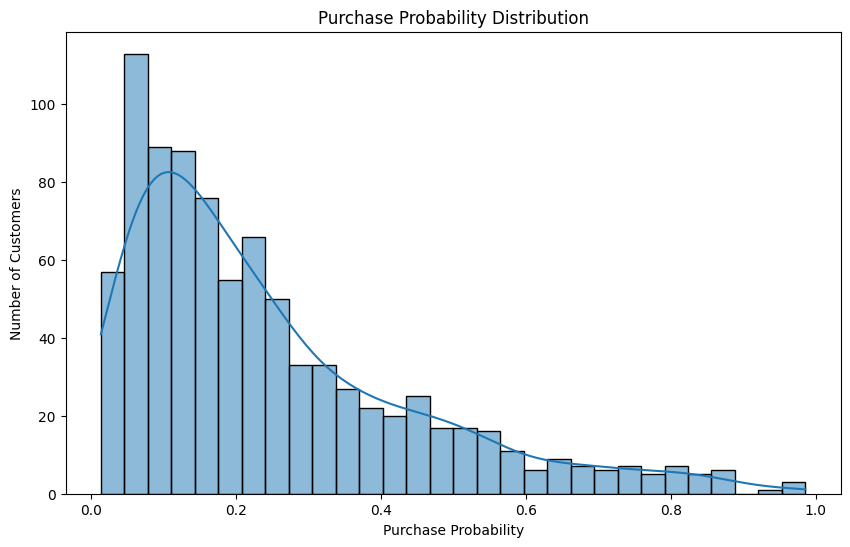

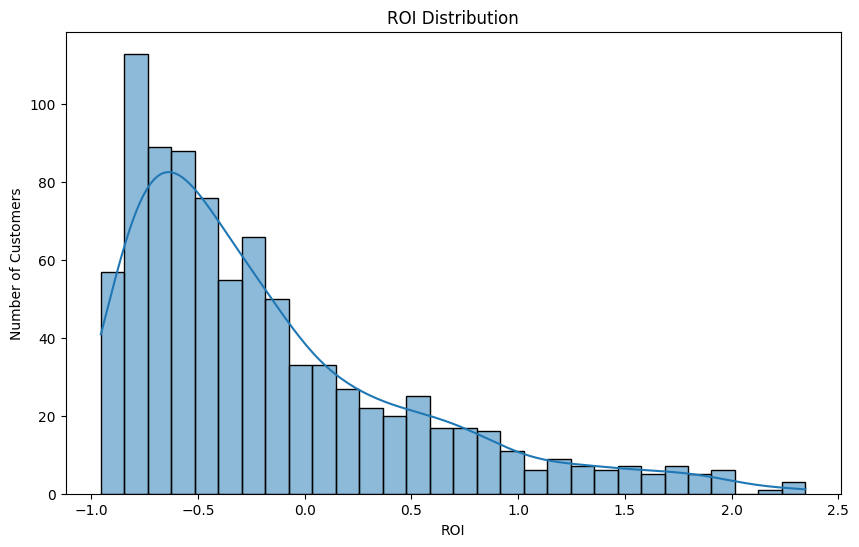

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Purchase probability distribution
plt.figure(figsize=(10,6))
sns.histplot(dfx['prob_1'], bins=30, kde=True)
plt.title('Purchase Probability Distribution')
plt.xlabel('Purchase Probability')
plt.ylabel('Number of Customers')
plt.show()

# Return on Investment (ROI) distribution
plt.figure(figsize=(10,6))
sns.histplot(dfx['ROI'], bins=30, kde=True)
plt.title('ROI Distribution')
plt.xlabel('ROI')
plt.ylabel('Number of Customers')
plt.show()


In [90]:
# 亏本客户（ROI < 0）
loss_customers = dfx[dfx['ROI'] < 0]
num_loss_customers = len(loss_customers)
print(f"亏本客户的数量: {num_loss_customers}")

# 可以赚钱的客户（ROI > 0）
profit_customers = dfx[dfx['ROI'] > 0]
num_profit_customers = len(profit_customers)
print(f"可以赚钱的客户的数量: {num_profit_customers}")
# 计算可以赚钱客户的总预期利润
total_profit_profit = profit_customers['Expected Profit'].sum() - profit_customers['Sample Cost'].sum()
print(f"可以赚钱客户的总体预期利润: {total_profit_profit}")


亏本客户的数量: 619
可以赚钱的客户的数量: 258
可以赚钱客户的总体预期利润: 799214.0066387646
